In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement_tbl = Base.classes.measurement

Station_tbl = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

session

# Exploratory Climate Analysis

The last 12 months are from 2016-08-23 to 2017-08-23


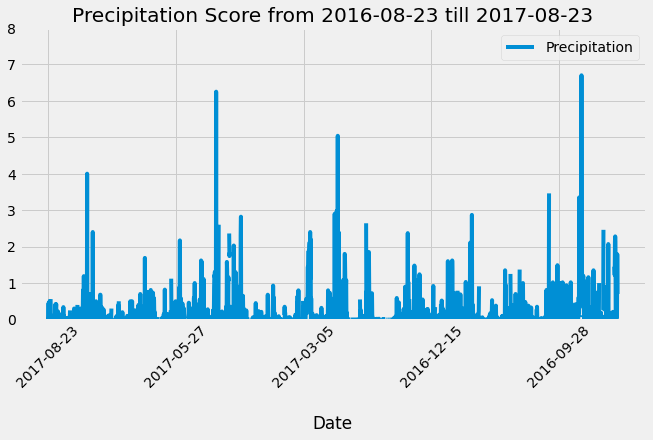

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
MaxDate = engine.execute("SELECT MAX(date) FROM Measurement").fetchall()
EndDate = MaxDate[0][0]

Year = int(EndDate[0:4])
Month = int(EndDate[5:7])
Day = int(EndDate[8:])

StartDate = dt.date(Year, Month, Day) - dt.timedelta(days=365)
print(f"The last 12 months are from {StartDate} to {EndDate}")

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement_tbl.date,Measurement_tbl.prcp)\
                          .filter(Measurement_tbl.date <= EndDate)\
                          .filter(Measurement_tbl.date >= StartDate)\
                          .order_by(Measurement_tbl.date.desc()).all()

# for data in prcp_data: 
#     print(data)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data).rename(columns={"date":"Date","prcp":"Precipitation"})
prcp_df.set_index("Date",inplace=True)

# Sort the dataframe by date
prcp_df.sort_values(by='Date', inplace=True, ascending=False)

prcp_df.head(3)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation Score from {StartDate} till {EndDate}',\
                  label="Precipitation",rot=45)

plt.legend(loc="upper right")
plt.xlabel("\nDate")
# plt.savefig("Precipitation_Analysis.jpg")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station_tbl).count()
print(f'Total number of stations is: {stations}')

Total number of stations is: 9


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Stations_desc = session.query(Measurement_tbl.station, func.count(Measurement_tbl.station)).\
    group_by(Measurement_tbl.station).order_by(func.count(Measurement_tbl.station).desc()).all()

Stations_desc


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Station = session.query(Measurement_tbl.station, func.count(Measurement_tbl.station)).\
    group_by(Measurement_tbl.station).order_by(func.count(Measurement_tbl.station).desc()).first()

# USC00519281 is the most active station
Stations_temp = session.query(func.min(Measurement_tbl.tobs), func.max(Measurement_tbl.tobs), func.avg(Measurement_tbl.tobs), func.count(Measurement_tbl.tobs)).\
    filter(Measurement_tbl.station == Station[0]).all()

print(f"The most active station is {Station[0]} with its lowest temperature, highest temperature, and average temperature.")
print()
print("Lowest Highest Average count")
print("---------------------------")

#Stations_temp
    
print(f"{round(Stations_temp[0][0],2)}   {round(Stations_temp[0][1],2)}    {round(Stations_temp[0][2],2)}   {round(Stations_temp[0][3],2)}")

The most active station is USC00519281 with its lowest temperature, highest temperature, and average temperature.

Lowest Highest Average count
---------------------------
54.0   85.0    71.66   2772


Text(0.5, -1.340000000000014, 'Temperature')

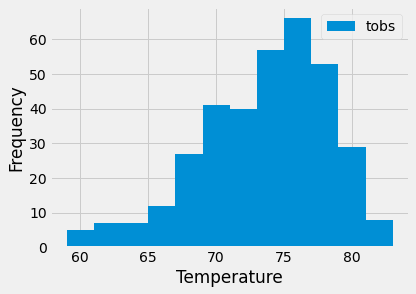

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement_tbl.tobs).\
    filter(Measurement_tbl.station == 'USC00519281').\
    filter(Measurement_tbl.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

## Bonus Challenge Assignment

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
